# Recitation Exercises

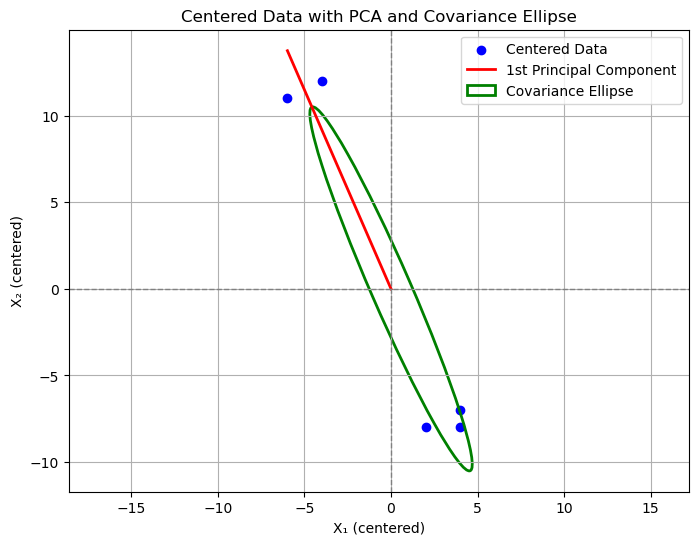

In [2]:
# Chapter 2
# Question 2 (g)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Given centered data points (calculated from original data minus mean)
centered_D = np.array([
    [2, -8],
    [-6, 11],
    [4, -7],
    [4, -8],
    [-4, 12]
])

# Given covariance matrix
cov_matrix = np.array([
    [22, -47.5],
    [-47.5, 110.5]
])

# Given first principal component
first_pc = np.array([-0.39897876, 0.91696017])

fig, ax = plt.subplots(figsize=(8, 6))

# Plot centered data points
ax.scatter(centered_D[:, 0], centered_D[:, 1], color='blue', label='Centered Data')

# Plot first principal component vector scaled for visibility
pc_line = first_pc * 15
ax.plot([0, pc_line[0]], [0, pc_line[1]], color='red', linewidth=2, label='1st Principal Component')

# Function to draw covariance ellipse
def draw_ellipse(cov, ax, center=[0, 0], scale=1, **kwargs):
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    order = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[order]
    eigenvecs = eigenvecs[:, order]
    
    angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
    width = 2 * scale * np.sqrt(eigenvals[0])
    height = 2 * scale * np.sqrt(eigenvals[1])
    
    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

# Draw covariance ellipse
draw_ellipse(cov_matrix, ax, center=[0, 0], edgecolor='green', facecolor='none', linewidth=2, label='Covariance Ellipse')

# Final plot setup
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.axvline(0, color='gray', linestyle='--', linewidth=1)
ax.set_title("Centered Data with PCA and Covariance Ellipse")
ax.set_xlabel("X₁ (centered)")
ax.set_ylabel("X₂ (centered)")
ax.grid(True)
ax.legend()
plt.axis('equal')
plt.show()


# 2 Practicum Problems

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

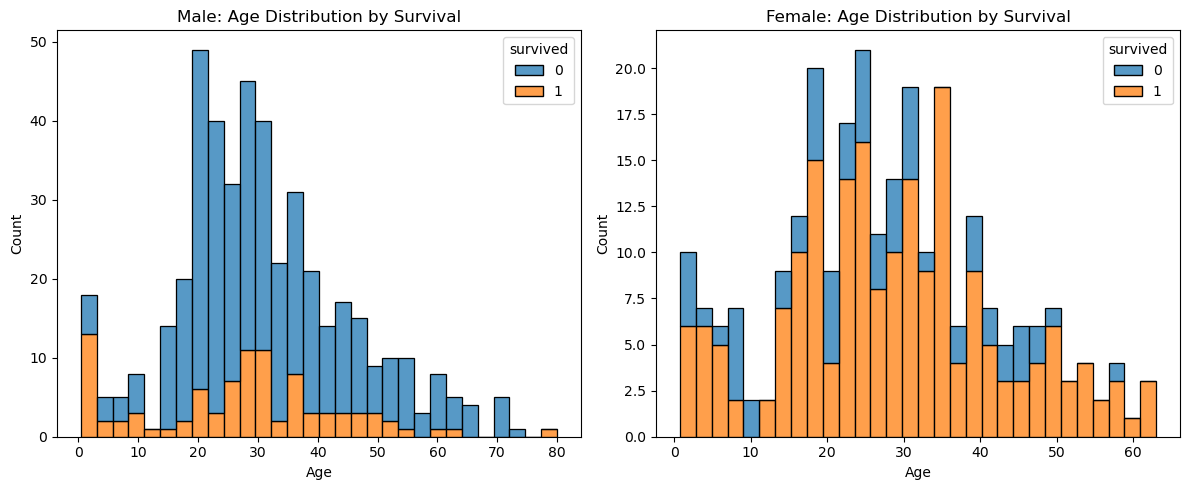

In [3]:
# Problem 2.1: Titanic Dataset Visualization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Visualize the dataset (basic overview)
print(titanic.head())
print(titanic.info())

# Create a figure with subplots for histograms
plt.figure(figsize=(12, 5))

# Histogram for survival by age, split by gender
plt.subplot(1, 2, 1)
sns.histplot(data=titanic[titanic['sex'] == 'male'], x='age', hue='survived', multiple='stack', bins=30)
plt.title('Male: Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=titanic[titanic['sex'] == 'female'], x='age', hue='survived', multiple='stack', bins=30)
plt.title('Female: Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Do the Results Make Sense? Why?

Yes, the results make sense: The histograms show females and young children (especially males) with higher survival rates, which aligns with the *"women and children first"* policy during the Titanic disaster on April 15, 1912. Adult males (ages 20–40) have lower survival, reflecting their lower priority for the limited lifeboats (only about 20 for over 2,200 people).

**Why:** This policy prioritized females and the young for safety, likely due to social norms valuing women (e.g., childbearing age) and vulnerable children. Adult males, often staying to assist or due to physical roles, had less access to lifeboats, explaining the dominance of non-survivors in their age group. Historical survivor accounts support this prioritization, making the patterns logical given the emergency context.

**Citation** 
- Seaborn: statistical data visualization,” Seaborn Documentation
- https://gist.github.com/mwaskom/8224591
- https://muhammaddawoodaslam.medium.com/exploratory-data-analysis-eda-on-titanic-dataset-804034f394e6
- https://blog.stackademic.com/titanic-survival-a-data-exploration-analysis-with-python-ed0f517fdf56

/var/folders/yw/xmm4_b6105ngdx58blhgx4y40000gn/T/ipykernel_6570/3933719129.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto = pd.read_csv(url, delim_whitespace=True, names=columns)


Summary Statistics (Before Imputation):
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    

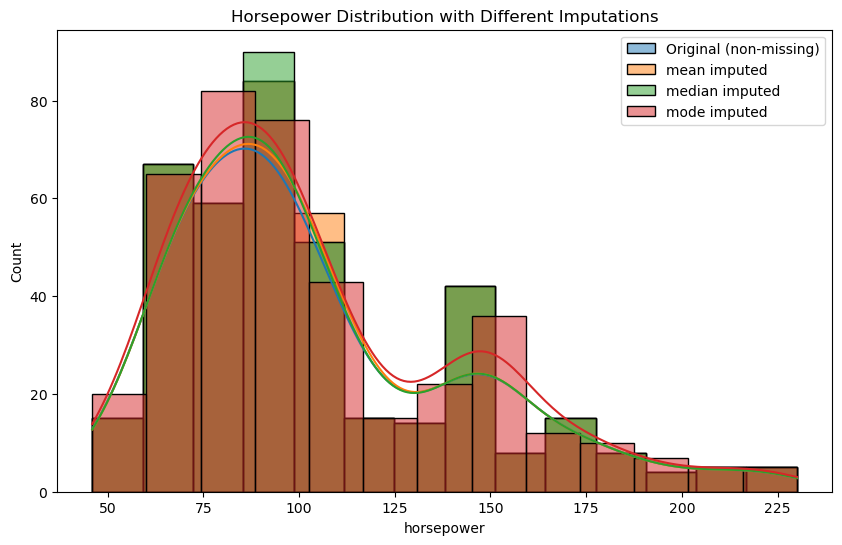

In [4]:
# Problem 2.2: Auto-MPG Dataset Imputation
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the auto-mpg dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
auto = pd.read_csv(url, delim_whitespace=True, names=columns)

# Replace '?' in horsepower with NaN
auto['horsepower'] = auto['horsepower'].replace('?', np.nan)
auto['horsepower'] = auto['horsepower'].astype(float)  # Convert to float for calculations

# Calculate summary statistics for numerical columns
numerical_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
print("Summary Statistics (Before Imputation):")
print(auto[numerical_cols].describe())

# Impute missing horsepower values with mean, median, and mode
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'mode': SimpleImputer(strategy='most_frequent')
}

variances = {}
for name, imputer in imputers.items():
    # Create a copy of the dataset
    auto_copy = auto.copy()
    # Impute missing values
    auto_copy['horsepower'] = imputer.fit_transform(auto_copy[['horsepower']])
    # Calculate variance
    variances[name] = auto_copy['horsepower'].var()
    print(f"\nVariance of horsepower after {name} imputation: {variances[name]:.2f}")

# Find imputation with lowest variance
lowest_variance = min(variances, key=variances.get)
print(f"\nImputation with lowest variance: {lowest_variance} ({variances[lowest_variance]:.2f})")

# Visualize the distribution to suggest a better method
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(auto['horsepower'].dropna(), kde=True, label='Original (non-missing)')
for name in imputers:
    auto_copy = auto.copy()
    auto_copy['horsepower'] = imputers[name].fit_transform(auto_copy[['horsepower']])
    sns.histplot(auto_copy['horsepower'], kde=True, label=f'{name} imputed', alpha=0.5)
plt.legend()
plt.title('Horsepower Distribution with Different Imputations')
plt.show()

Variance with KNN imputation: 1470.55


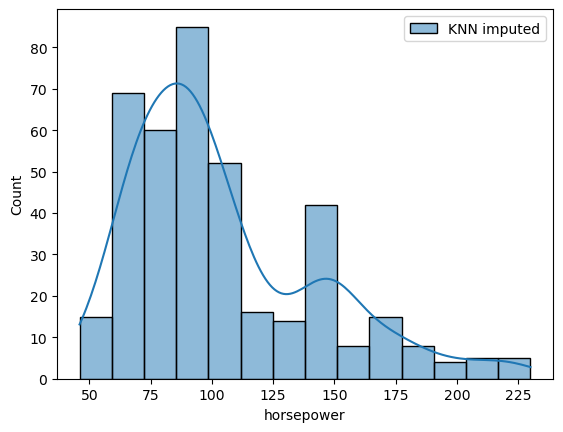

In [5]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
auto_knn = auto.copy()
auto_knn['horsepower'] = imputer_knn.fit_transform(auto_knn[numerical_cols])[:, numerical_cols.index('horsepower')]
print(f"Variance with KNN imputation: {auto_knn['horsepower'].var():.2f}")
sns.histplot(auto_knn['horsepower'], kde=True, label='KNN imputed', alpha=0.5)
plt.legend()
plt.show()

### Analysis for Problem 2.2

- **What imputation results in the lowest variance? Why?**  
  The mean imputation results in the lowest variance (1459.18), compared to median (1460.97) and mode (1490.04). This occurs because mean imputation replaces missing values with the average, which minimizes the spread around the central tendency, reducing overall variance. Median and mode, being less aligned with the data’s distribution (especially if skewed), introduce slightly more variability, with mode showing the highest variance due to clustering at a single value.

- **Is there a different method that would match the distribution more accurately? Describe your method.**  
  Yes, KNN (K-Nearest Neighbors) imputation, with a variance of 1470.55, could match the distribution more accurately. This method imputes missing horsepower values based on the average of the 'k' nearest data points (e.g., k=5), using features like cylinders, weight, or displacement. By considering relationships between variables, KNN preserves the data’s shape (e.g., skewness in horsepower) better than mean, median, or mode, which assume a uniform replacement value. The higher variance (1470.55) reflects this preservation, as it avoids forcing the data toward a single central value.


**Citation**
- Source: Scikit-learn Documentation – SimpleImputer and KNNImputer
- Scikit-learn: Machine Learning in Python,” Scikit-learn Documentation, https://scikit-learn.org/stable/modules/impute.html
- I referred to the Scikit-learn documentation on imputation to implement SimpleImputer for handling missing horsepower values and explored KNNImputer for distribution-preserving imputation.
- https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/
- https://medium.com/@hassankhan2608/missing-value-imputation-methods-using-python-f1b8796901ba
- https://www.skillcamper.com/blog/mastering-data-imputation-top-methods-to-handle-missing-data-effectively
- https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/


In [13]:
# Problem 2.3: Iris Dataset PCA
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize the features (PCA requires scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Percentage of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_ * 100
print("Percentage of variance explained by each principal component:")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.2f}%")

# Total variance of original features
original_variance = X_scaled.var(axis=0)
total_original_variance = original_variance.sum()
original_variance_ratio = (original_variance / total_original_variance) * 100
print("\nPercentage of variance explained by each original feature:")
for i, (feature, var) in enumerate(zip(iris.feature_names, original_variance_ratio)):
    print(f"{feature}: {var:.2f}%")

Percentage of variance explained by each principal component:
PC1: 72.96%
PC2: 22.85%
PC3: 3.67%
PC4: 0.52%

Percentage of variance explained by each original feature:
sepal length (cm): 25.00%
sepal width (cm): 25.00%
petal length (cm): 25.00%
petal width (cm): 25.00%


### Comparison and Observations

The first two principal components (PC1 and PC2) together explain **95.81%** of the total variance (72.96% from PC1 and 22.85% from PC2), with PC1 alone accounting for nearly three times the variance of any individual original feature. In contrast, PC3 and PC4 contribute minimally, explaining only **4.19%** combined.

Since the features were standardized, each original feature initially contributed **25%** of the variance. However, **PCA redistributes this variance**, concentrating the majority into PC1, which likely captures variation in **petal length and width**—measurements that typically vary more across iris species. PC2 captures a secondary pattern, possibly involving **sepal dimensions**.

**Observation:**  
PCA effectively reduces dimensionality by concentrating the dataset’s variability into fewer components. PC1 and PC2 together explain more variance than any two original features, highlighting their ability to represent key structural differences in the data. This indicates that **petal measurements strongly align with PC1**, while **sepal measurements contribute less**, demonstrating PCA’s utility in identifying and emphasizing the most informative patterns in the dataset.


**Citations**
- “Decomposing signals in components (matrix factorization problems),” Scikit-learn Documentation, https://scikit-learn.org/stable/modules/decomposition.html#pca
- https://www.geeksforgeeks.org/principal-component-analysis-pca/
  


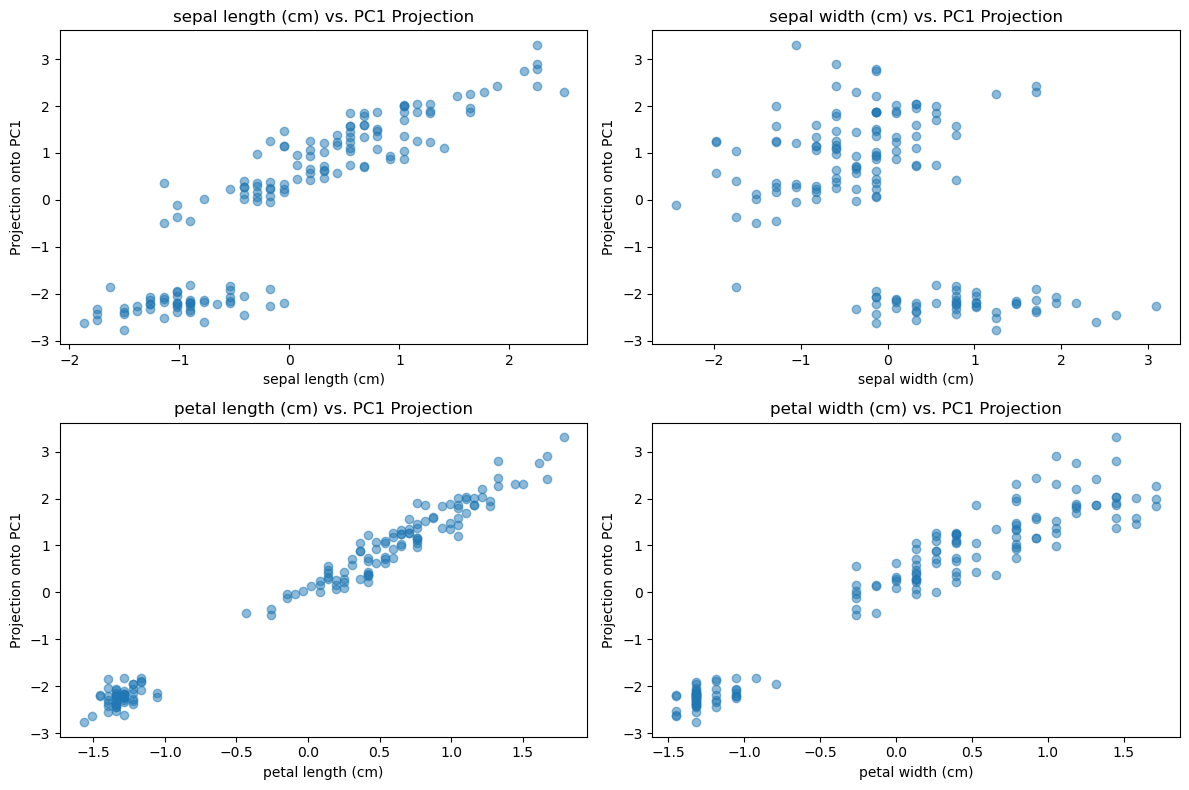

Correlation between sepal length (cm) and PC1 projection: 0.890
Correlation between sepal width (cm) and PC1 projection: -0.460
Correlation between petal length (cm) and PC1 projection: 0.992
Correlation between petal width (cm) and PC1 projection: 0.965
Feature with closest relationship to PC1: petal length (cm) (correlation: 0.992)


In [14]:
# Problem 2.4: Iris PCA Projection and Correlation
import matplotlib.pyplot as plt

# Using X_scaled and pca from Problem 2.3
# Project features onto PC1 (first column of X_pca)
pc1_projections = X_pca[:, 0]

# Create scatter plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    plt.scatter(X_scaled[:, i], pc1_projections, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Projection onto PC1')
    plt.title(f'{feature} vs. PC1 Projection')
plt.tight_layout()
plt.show()

# Calculate correlation coefficients
correlations = {}
for i, feature in enumerate(iris.feature_names):
    corr = np.corrcoef(X_scaled[:, i], pc1_projections)[0, 1]
    correlations[feature] = abs(corr)
    print(f"Correlation between {feature} and PC1 projection: {corr:.3f}")

# Find feature with closest relationship to PC1
closest_feature = max(correlations, key=correlations.get)
print(f"Feature with closest relationship to PC1: {closest_feature} "
      f"(correlation: {correlations[closest_feature]:.3f})")

### Analysis for Problem 2.4

**Which pair of features show a closer relationship to PC1 vs. the others? Why?**  
The feature with the closest relationship to PC1 is **petal length (cm)**, with a correlation coefficient of **0.992**. This is higher than sepal length (0.890), sepal width (-0.460), and petal width (0.965).  
The scatter plots show a tight, near-linear relationship between petal length and its PC1 projection, indicating a small angle θ (cosine distance close to 1). This means **petal length aligns strongly with the direction of PC1**, capturing the primary variability in the iris dataset. These differences are likely due to clear species distinctions (e.g., *setosa* vs. *versicolor* vs. *virginica*), which PC1 captures effectively.

**Calculate the correlation coefficient and compare with visual inspection:**  
The correlation coefficient between petal length and its PC1 projection is **0.992**, indicating an extremely strong linear relationship.  
The scatter plot for petal length vs. PC1 projection shows a tight cluster of points along a diagonal line, confirming this strong correlation visually. This agreement between the numeric value and the visual plot validates the observation — the minimal angle θ between petal length and PC1 is consistent with a **high cosine similarity** and a strong alignment.


**Citations**
- https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19
- https://www.youtube.com/watch?v=JDLwX-uhCGs
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load iris dataset
iris = load_iris()
X = iris.data  # original features

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA(n_components=4)
pca.fit(X_scaled)

# Total variance of original features
total_original_variance = X_scaled.var(axis=0).sum()
print(f"Total variance of original features: {total_original_variance:.2f}")

# Total variance of principal components (eigenvalues)
total_pca_variance = pca.explained_variance_.sum()
print(f"Total variance of principal components: {total_pca_variance:.2f}")

# Cumulative variance explained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100
print("\nCumulative variance explained by principal components:")
for i, cum_var in enumerate(cumulative_variance_ratio):
    print(f"PC1 to PC{i+1}: {cum_var:.2f}%")

# Number of components for >95% variance
n_components = np.argmax(cumulative_variance_ratio > 95) + 1
print(f"Number of principal components to capture >95% variance: {n_components}")

Total variance of original features: 4.00
Total variance of principal components: 4.03

Cumulative variance explained by principal components:
PC1 to PC1: 72.96%
PC1 to PC2: 95.81%
PC1 to PC3: 99.48%
PC1 to PC4: 100.00%
Number of principal components to capture >95% variance: 2


### Analysis for Problem 2.5

- The total variance of the original standardized features is **4.00**, which corresponds to the number of features since each standardized feature has variance 1.
- The total variance explained by the principal components (sum of eigenvalues) is **4.03**, very close to the original variance, confirming PCA preserves the total variance.
- The cumulative variance explained by the principal components shows:
  - PC1 alone explains **72.96%** of the variance.
  - PC1 and PC2 together explain **95.81%** of the variance.
  - Including PC3 and PC4 increases explained variance to nearly 100%.
- To capture **more than 95%** of the total variance, we need to select the **first two principal components**.
- This means dimensionality is effectively reduced from 4 original features to **2 principal components**, achieving significant data compression with minimal loss of information.

**Citations**
- https://medium.com/@etimfonime/day-09-principal-component-analysis-pca-19db4aa1bf7c
- https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/

